<a href="https://colab.research.google.com/github/giabaoitwork/Security/blob/main/Project_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ML'

Mounted at /content/gdrive
/content/gdrive/MyDrive/ML


In [ ]:
!unzip "HandwrittenData.csv.zip"

Archive:  HandwrittenData.csv.zip
  inflating: A_Z Handwritten Data.csv  
  inflating: __MACOSX/._A_Z Handwritten Data.csv  


In [ ]:
data = pd.read_csv('HandwrittenData.csv').astype('float32')

In [ ]:
data

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
labels = data['0']
data = data.drop('0', axis=1)

In [ ]:
images = data.values.reshape(-1, 28, 28, 1)
images /= 255.0

In [ ]:
labels = to_categorical(labels, num_classes=26)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(26, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
2328/2328 [==============================] - 270s 116ms/step - loss: 0.3201 - accuracy: 0.9082 - val_loss: 0.0832 - val_accuracy: 0.9762
Epoch 2/10
2328/2328 [==============================] - 259s 111ms/step - loss: 0.1385 - accuracy: 0.9613 - val_loss: 0.0689 - val_accuracy: 0.9808
Epoch 3/10
2328/2328 [==============================] - 260s 112ms/step - loss: 0.1068 - accuracy: 0.9699 - val_loss: 0.0516 - val_accuracy: 0.9863
Epoch 4/10
2328/2328 [==============================] - 257s 111ms/step - loss: 0.0874 - accuracy: 0.9754 - val_loss: 0.0475 - val_accuracy: 0.9877
Epoch 5/10
2328/2328 [==============================] - 253s 109ms/step - loss: 0.0753 - accuracy: 0.9782 - val_loss: 0.0428 - val_accuracy: 0.9889
Epoch 6/10
2328/2328 [==============================] - 263s 113ms/step - loss: 0.0681 - accuracy: 0.9804 - val_loss: 0.0406 - val_accuracy: 0.9895
Epoch 7/10
2328/2328 [==============================] - 257s 111ms/step - loss: 0.0601 - accuracy: 0.9823 - val_

In [ ]:
model.save_weights('projectML.h5')

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03363605588674545
Test accuracy: 0.991878092288971


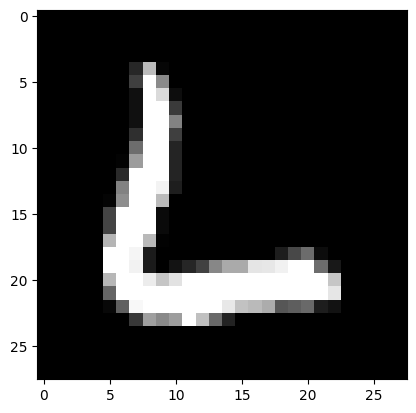

NameError: name 'model' is not defined

In [ ]:
index = 5
image = x_test[index]
plt.imshow(image.reshape(28, 28), cmap='gray')
plt.show()

prediction = model.predict(np.expand_dims(image, axis=0))
print('Predicted label:', chr(np.argmax(prediction) + 65))

In [ ]:
def preprocess_image(image):
    resized = cv2.resize(image, (28, 28))

    normalized = resized.astype('float32') / 255.0

    reshaped = np.expand_dims(normalized, axis=-1)
    reshaped = np.expand_dims(reshaped, axis=0)

    return reshaped


In [ ]:
def predict_character(image_path, model):
    processed_image = preprocess_image(image_path)
    prediction = model.predict(processed_image)
    predicted_label = chr(np.argmax(prediction) + 65)
    return predicted_label

In [ ]:
def segment_characters(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    _, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)

    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    contours = sorted(contours, key=lambda c: cv2.boundingRect(c)[0])

    characters = []
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)

        char = image[y:y+h, x:x+w]

        characters.append(char)

    return characters

In [ ]:
def recognize_text(image_path, model):
    characters = segment_characters(image_path)
    recognized_text = ""

    for char in characters:
        processed_image = preprocess_image(char)
        prediction = model.predict(processed_image)
        predicted_label = chr(np.argmax(prediction) + 65)
        recognized_text += predicted_label

    return recognized_text

In [ ]:
from google.colab import files
uploaded = files.upload()


image_path = list(uploaded.keys())[0]

recognized_text = recognize_text(image_path, model)
print('Recognized text:', recognized_text)

Saving imgtest.jpeg to imgtest (3).jpeg
1/1 [==============================] - 0s 23ms/step
Recognized text: T


In [ ]:

# cái này code dưới máy local thì chạy mà bỏ lên colab nó hông chịu chạy :(
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()

    if not ret:
        break

    predicted_label = predict_character(frame, model)

    cv2.putText(frame, f'Predicted: {predicted_label}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    cv2.imshow('Handwritten Character Recognition', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()